In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error



In [44]:
# I was getting an error that some of the columns had multiple datatypes so I specified them
bottle_df = pd.read_csv('../bottle.csv', dtype={'MeanAq':float, 'ph1': object})
cast_df = pd.read_csv('../cast.csv', dtype={'Orig_Sta_ID': 'string', 'Data_Or': 'string', 'IntC14':float, 
                                            'Inc_Str': 'string', 'Inc_End': 'string', 'PST_LAN': 'string'})

### Preprocessing the Bottle dataset

In [42]:
bottle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 74 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Cst_Cnt              864863 non-null  int64  
 1   Btl_Cnt              864863 non-null  int64  
 2   Sta_ID               864863 non-null  object 
 3   Depth_ID             864863 non-null  object 
 4   Depthm               864863 non-null  int64  
 5   T_degC               853900 non-null  float64
 6   Salnty               817509 non-null  float64
 7   O2ml_L               696201 non-null  float64
 8   STheta               812174 non-null  float64
 9   O2Sat                661274 non-null  float64
 10  Oxy_µmol/Kg          661268 non-null  float64
 11  BtlNum               118667 non-null  float64
 12  RecInd               864863 non-null  int64  
 13  T_prec               853900 non-null  float64
 14  T_qual               23127 non-null   float64
 15  S_prec           

#### Since we'll be looking at temperature and salinity begin by getting rid of rows where salinity and temp are null

In [ ]:
bottle_salinity_subset= bottle_df[bottle_df['Salnty'].notnull()]
bottle_salinity_subset.info()

In [46]:
bottle_temp_subset = bottle_salinity_subset[bottle_salinity_subset['T_degC'].notnull()]
bottle_temp_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 814247 entries, 0 to 864862
Data columns (total 74 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Cst_Cnt              814247 non-null  int64  
 1   Btl_Cnt              814247 non-null  int64  
 2   Sta_ID               814247 non-null  object 
 3   Depth_ID             814247 non-null  object 
 4   Depthm               814247 non-null  int64  
 5   T_degC               814247 non-null  float64
 6   Salnty               814247 non-null  float64
 7   O2ml_L               661489 non-null  float64
 8   STheta               812174 non-null  float64
 9   O2Sat                661274 non-null  float64
 10  Oxy_µmol/Kg          661268 non-null  float64
 11  BtlNum               118613 non-null  float64
 12  RecInd               814247 non-null  int64  
 13  T_prec               814247 non-null  float64
 14  T_qual               12146 non-null   float64
 15  S_prec           

In [61]:
# drop the columns where there is less than 814247 rows (the number of rows where salinity and temp are not null)

bottle_nonull = pd.DataFrame(bottle_temp_subset.dropna(axis =1, thresh =814247))
bottle_nonull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 814247 entries, 0 to 864862
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Cst_Cnt     814247 non-null  int64  
 1   Btl_Cnt     814247 non-null  int64  
 2   Sta_ID      814247 non-null  object 
 3   Depth_ID    814247 non-null  object 
 4   Depthm      814247 non-null  int64  
 5   T_degC      814247 non-null  float64
 6   Salnty      814247 non-null  float64
 7   RecInd      814247 non-null  int64  
 8   T_prec      814247 non-null  float64
 9   S_prec      814247 non-null  float64
 10  R_Depth     814247 non-null  float64
 11  R_TEMP      814247 non-null  float64
 12  R_SALINITY  814247 non-null  float64
 13  R_PRES      814247 non-null  int64  
dtypes: float64(7), int64(5), object(2)
memory usage: 93.2+ MB


In [62]:
bottle_nonull.head(15)

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,RecInd,T_prec,S_prec,R_Depth,R_TEMP,R_SALINITY,R_PRES
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,3,1.0,2.0,0.0,10.50,33.440,0
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,3,2.0,2.0,8.0,10.46,33.440,8
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,7,2.0,3.0,10.0,10.46,33.437,10
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,3,2.0,2.0,19.0,10.45,33.420,19
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,7,2.0,3.0,20.0,10.45,33.421,20
5,1,6,054.0 056.0,19-4903CR-HY-060-0930-05400560-0030A-7,30,10.45,33.431,7,2.0,3.0,30.0,10.45,33.431,30
6,1,7,054.0 056.0,19-4903CR-HY-060-0930-05400560-0039A-3,39,10.45,33.440,3,2.0,2.0,39.0,10.45,33.440,39
7,1,8,054.0 056.0,19-4903CR-HY-060-0930-05400560-0050A-7,50,10.24,33.424,7,2.0,3.0,50.0,10.24,33.424,50
8,1,9,054.0 056.0,19-4903CR-HY-060-0930-05400560-0058A-3,58,10.06,33.420,3,2.0,2.0,58.0,10.06,33.420,58
9,1,10,054.0 056.0,19-4903CR-HY-060-0930-05400560-0075A-7,75,9.86,33.494,7,2.0,3.0,75.0,9.86,33.494,75


In [63]:
bottle_nonull['Sta_ID'].value_counts()

090.0 045.0    9550
090.0 070.0    9531
090.0 037.0    9449
090.0 060.0    9083
080.0 060.0    8923
               ... 
106.0 045.0       1
068.0 060.0       1
095.0 040.0       1
085.0 065.0       1
068.0 050.0       1
Name: Sta_ID, Length: 2527, dtype: int64

#### Recode nominal values

In [64]:
# Recode the Station IDs
from sklearn.preprocessing import LabelEncoder
station_labels = LabelEncoder()
bottle_nonull['Sta_ID']=station_labels.fit_transform(bottle_nonull['Sta_ID'].values)
bottle_nonull.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,RecInd,T_prec,S_prec,R_Depth,R_TEMP,R_SALINITY,R_PRES
0,1,1,312,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,3,1.0,2.0,0.0,10.50,33.440,0
1,1,2,312,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,3,2.0,2.0,8.0,10.46,33.440,8
2,1,3,312,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,7,2.0,3.0,10.0,10.46,33.437,10
3,1,4,312,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,3,2.0,2.0,19.0,10.45,33.420,19
4,1,5,312,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,7,2.0,3.0,20.0,10.45,33.421,20


In [66]:
# Drop the redundant and unneccessary columns

# create a list of the columns to drop
drop_list = ['Cst_Cnt', 'Btl_Cnt', 'Depth_ID', 'Depthm', 'R_TEMP', 'R_SALINITY']
bottle_nonull = bottle_nonull.drop(drop_list, axis =1)

bottle_nonull.head()

,Sta_ID,T_degC,Salnty,RecInd,T_prec,S_prec,R_Depth,R_PRES
0,312,10.50,33.440,3,1.0,2.0,0.0,0
1,312,10.46,33.440,3,2.0,2.0,8.0,8
2,312,10.46,33.437,7,2.0,3.0,10.0,10
3,312,10.45,33.420,3,2.0,2.0,19.0,19
4,312,10.45,33.421,7,2.0,3.0,20.0,20


In [70]:
bottle_nonull.describe()

,Sta_ID,T_degC,Salnty,RecInd,T_prec,S_prec,R_Depth,R_PRES
count,814247.000000,814247.000000,814247.000000,814247.000000,814247.000000,814247.000000,814247.000000,814247.000000
mean,1236.056021,10.860287,33.841337,4.692909,2.017043,2.719339,221.937416,223.428334
std,574.008950,4.224930,0.461636,1.870415,0.148013,0.449322,308.657223,311.960419
min,0.000000,1.440000,28.431000,3.000000,1.000000,2.000000,0.000000,0.000000
25%,788.000000,7.750000,33.489000,3.000000,2.000000,2.000000,46.000000,46.000000
50%,1148.000000,10.110000,33.866000,3.000000,2.000000,3.000000,125.000000,126.000000
75%,1650.000000,13.930000,34.197000,7.000000,2.000000,3.000000,300.000000,302.000000
max,2526.000000,31.140000,37.034000,7.000000,3.000000,3.000000,5351.000000,5458.000000


#### Standardizing the data

In [71]:
# Import StandardScaler from scikit-learn
from sklearn.preprocessing import StandardScaler

# Create the scaler
ss = StandardScaler()

# Take a subset of the DataFrame you want to scale 
bottle_to_scale = bottle_nonull[['T_degC', 'Salnty', 'R_Depth', 'R_PRES']]

# Apply the scaler to the DataFrame subset
bottle_scaled = ss.fit_transform(bottle_to_scale)

In [76]:
bottle_scaled_df = pd.DataFrame(bottle_scaled)
bottle_scaled_df.columns = ['T_degC', 'Salnty', 'R_Depth', 'R_PRES']
bottle_scaled_df.head()

,T_degC,Salnty,R_Depth,R_PRES
0,-0.085277,-0.869381,-0.719042,-0.716208
1,-0.094744,-0.869381,-0.693123,-0.690563
2,-0.094744,-0.875879,-0.686644,-0.684152
3,-0.097111,-0.912705,-0.657485,-0.655303
4,-0.097111,-0.910539,-0.654245,-0.652097


# Question 2 Correlation Matrix

Water temperature is negatively correlated with salinity, recorded depth, and recorded pressure.  It is most strongly correlated with recorded depth. Recorded depth and pressure are very strongly correlated, but those numbers are almost the same so that isn"t surprising.

In [77]:
bottle_scaled_df.corr()

,T_degC,Salnty,R_Depth,R_PRES
T_degC,1.000000,-0.505266,-0.676502,-0.675116
Salnty,-0.505266,1.000000,0.572866,0.571640
R_Depth,-0.676502,0.572866,1.000000,0.999994
R_PRES,-0.675116,0.571640,0.999994,1.000000


In [75]:
bottle_nonull.corr()

,Sta_ID,T_degC,Salnty,RecInd,T_prec,S_prec,R_Depth,R_PRES
Sta_ID,1.000000,0.228739,0.344379,0.008800,-0.069948,-0.168378,0.004843,0.004430
T_degC,0.228739,1.000000,-0.505266,-0.062625,-0.047593,-0.036218,-0.676502,-0.675116
Salnty,0.344379,-0.505266,1.000000,0.065717,-0.019075,-0.083097,0.572866,0.571640
RecInd,0.008800,-0.062625,0.065717,1.000000,0.034981,0.358089,0.078025,0.077883
T_prec,-0.069948,-0.047593,-0.019075,0.034981,1.000000,0.098015,0.025977,0.025999
S_prec,-0.168378,-0.036218,-0.083097,0.358089,0.098015,1.000000,0.003205,0.003286
R_Depth,0.004843,-0.676502,0.572866,0.078025,0.025977,0.003205,1.000000,0.999994
R_PRES,0.004430,-0.675116,0.571640,0.077883,0.025999,0.003286,0.999994,1.000000


# Question 3 Linear Regression

In [131]:
X = np.array(bottle_scaled_df['Salnty']).reshape(-1,1)
y = np.array(bottle_scaled_df['T_degC']).reshape(-1,1)
#confirm the arrays are shaped appropriately
print(X.shape, y.shape)

reg = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=33)

#fit the regression
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
accuracy_score = reg.score(X_test, y_test)
print(y_pred)
print(accuracy_score)
#.25 is not a very good accuracy score

(814247, 1) (814247, 1)
[[-0.32265501]
 [ 0.02347066]
 [-0.62277663]
 ...
 [-0.24379093]
 [ 0.63904859]
 [ 0.00704065]]
0.2545389842578609


In [98]:
from sklearn.model_selection import cross_val_score

cv_results = cross_val_score(reg, X, y, cv=5)
print(cv_results)
np.mean(cv_results)

# cross validation gives a mean of 0.24 still pretty bad accuracy score

[ 0.30762301 -0.1658557   0.09907612  0.46360397  0.50389347]


0.2416681724675922

# Question 4  mean squared error and R squared values

R squared tells you how much of the variance in the dependent variable can be predicted by the independent variable
Mean Squared error tells you how the average distance from each point to the predicted regression model or an estimate of error of variance.

In [87]:
r2_score(y_test, y_pred) #should be the same as the accuracy score

0.2545389842578609

In [88]:
mean_squared_error(y_test, y_pred)

0.7461586978498324

# Question 5 Plot the relationship between water temp and salinity

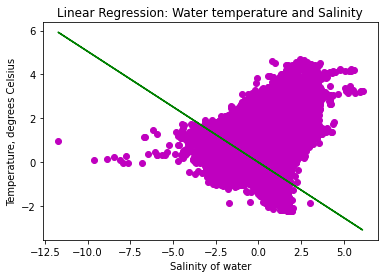

In [132]:
fig, ax = plt.subplots()
ax.set(title='Linear Regression: Water temperature and Salinity',
      ylabel = 'Temperature, degrees Celsius',
      xlabel = 'Salinity of water')
plt.scatter(X_test, y_test, color = 'm')
plt.plot(X_test, y_pred, color='g')
plt.show()

# this makes sense, since we only had 25% accuracy

# Question 6 Polynomial Regression
Polynomial regression is when you raise features to an exponent, creating new variable(s) that the model can use to make better predictions. So if you have a feature X and you cube it the result is that you now have features X, X2, and X3. All of them can now be used. It is helpful if the pattern you're trying to identify is nonlinear.

# Question 7 Perform polynomial regression

In [141]:
from sklearn.preprocessing import PolynomialFeatures

# perform a polynomial features transform of the dataset
trans = PolynomialFeatures(degree=3)
X_poly = trans.fit_transform(X)
X_poly.shape

(814247, 4)

In [126]:
X2 = X_poly
y2 = np.array(bottle_scaled_df['T_degC']).reshape(-1,1)
#confirm the arrays are shaped appropriately
print(X.shape, y.shape)

reg_poly = LinearRegression()

X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X2,y2, test_size=0.3, random_state=33)

#fit the regression
reg_poly.fit(X_train_poly, y_train_poly)

y_pred_poly = reg_poly.predict(X_test_poly)
accuracy_score = reg_poly.score(X_test_poly, y_test_poly)
print(y_pred_poly)
print(accuracy_score)
# slightly better accuracy at 32.9%

(814247, 4) (814247, 1)
[[-0.47116529]
 [-0.08052541]
 [-0.65088218]
 ...
 [-0.39620438]
 [ 0.7971562 ]
 [-0.10212818]]
0.3294710387816062


In [127]:
r2_score(y_test_poly, y_pred_poly)

0.3294710387816062

In [128]:
mean_squared_error(y_test_poly, y_pred_poly)

0.6711565138992895

In [129]:
print(X_test_poly.shape, y_test_poly.shape, y_pred_poly.shape)

(244275, 4) (244275, 1) (244275, 1)


In [137]:
print(X_test.shape, y_test.shape)

(244275, 1) (244275, 1)


In [139]:
z = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
z = np.array(z)
z.shape

(18,)

# Question 8 Plot the polynomial regression

I tried several times to plot the data using the calculated polynomial regression above but it kept saying that my X_test and y_test weren't the same size. I think it's because of the order of when I fit the data here vs there. The accuracy score's for both methods are the same.

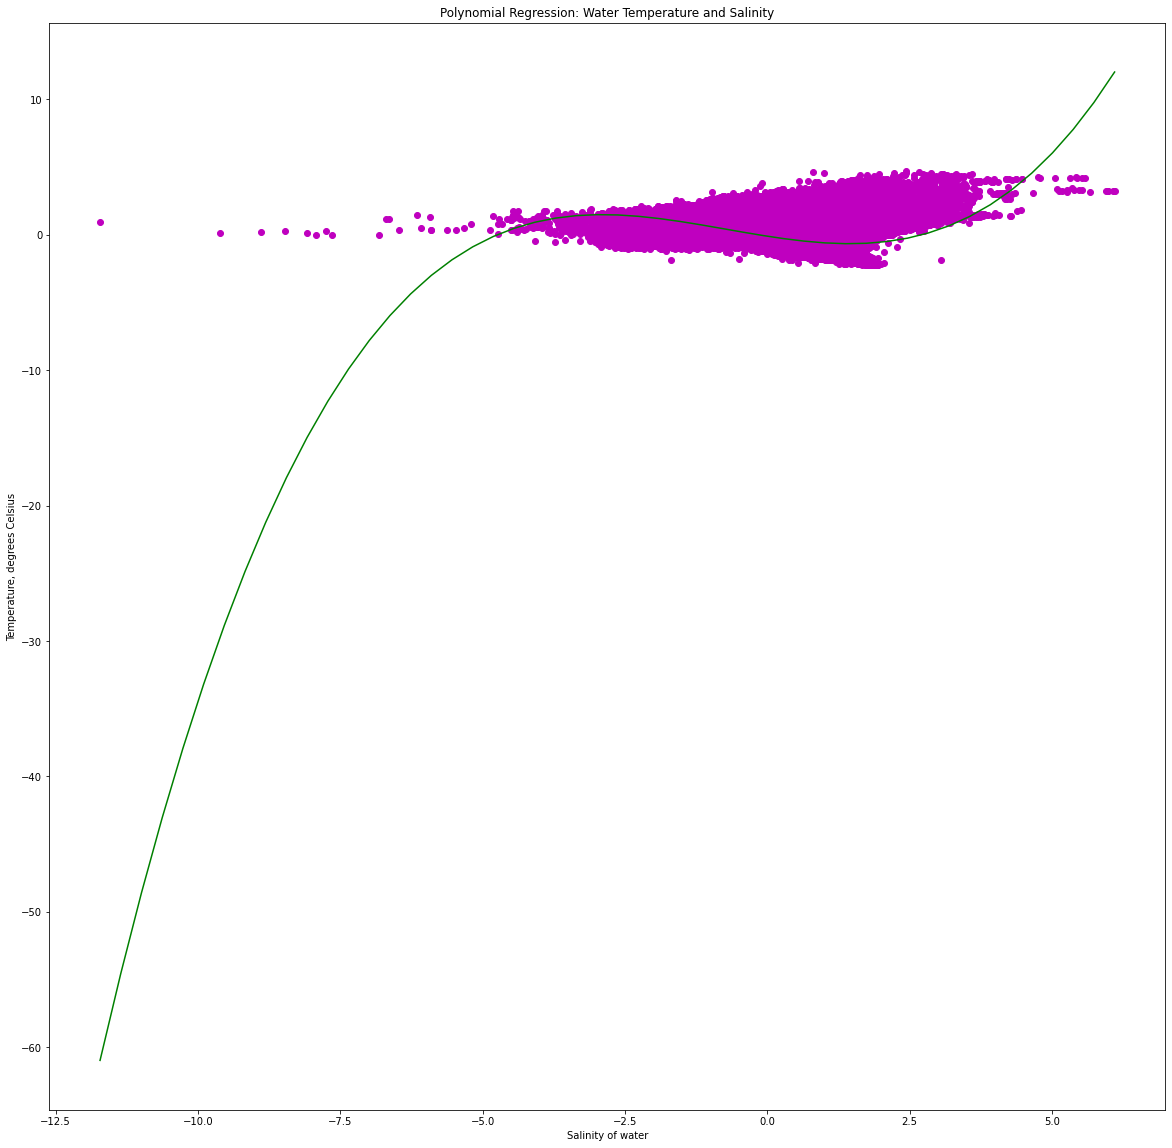

In [153]:

prediction_space = np.linspace(min(X), max(X)) # got this from Amanda

poly = PolynomialFeatures(degree=3)

x_poly2 = poly.fit_transform(X_train)
poly.fit(X_train, y_train)

model = LinearRegression()
model.fit(x_poly2, y_train)

y_pred2= model.predict(poly.fit_transform(X_test))


fig, ax = plt.subplots(figsize=(20,20))

ax.set(title='Polynomial Regression: Water Temperature and Salinity',
      ylabel = 'Temperature, degrees Celsius',
      xlabel = 'Salinity of water')
plt.scatter(X_test, y_test, color = 'm')
plt.plot(prediction_space, model.predict(poly.fit_transform(prediction_space)), color ='g') # got this from Amanda
#plt.plot(X_test, y_pred2, color='g')
plt.show()

In [149]:
print(y_pred2)
accuracy2 = model.score(poly.fit_transform(X_test), y_test)
accuracy2

[[-0.47116529]
 [-0.08052541]
 [-0.65088218]
 ...
 [-0.39620438]
 [ 0.7971562 ]
 [-0.10212818]]


0.3294710387816062

### Preprocessing the Cast dataset

In [67]:
cast_df.head()

,Cst_Cnt,Cruise_ID,Cruise,Cruz_Sta,DbSta_ID,Cast_ID,Sta_ID,Quarter,Sta_Code,Distance,...,Wave_Prd,Wind_Dir,Wind_Spd,Barometer,Dry_T,Wet_T,Wea,Cloud_Typ,Cloud_Amt,Visibility
0,1,1949-03-01-C-31CR,194903,19490305400560,5400560,19-4903CR-HY-060-0930-05400560,054.0 056.0,1,NST,NaN,...,NaN,23.0,18.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
1,2,1949-03-01-C-31CR,194903,19490305200750,5200750,19-4903CR-HY-060-2112-05200750,052.0 075.0,1,NST,NaN,...,NaN,16.0,5.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN
2,3,1949-03-01-C-31CR,194903,19490305100850,5100850,19-4903CR-HY-061-0354-05100850,051.0 085.0,1,NST,NaN,...,NaN,23.0,5.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN
3,4,1949-03-01-C-31CR,194903,19490305000950,5000950,19-4903CR-HY-061-1042-05000950,050.0 095.0,1,NST,NaN,...,NaN,18.0,8.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
4,5,1949-03-01-C-31CR,194903,19490305001040,5001040,19-4903CR-HY-061-1706-05001040,050.0 104.0,1,NST,NaN,...,NaN,27.0,13.0,NaN,NaN,NaN,7.0,NaN,NaN,NaN


In [40]:
cast_df.info() # might want to drop 'Data_Or', 'IntC14', 'Inc_Str'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34404 entries, 0 to 34403
Data columns (total 61 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Cst_Cnt      34404 non-null  int64  
 1   Cruise_ID    34404 non-null  object 
 2   Cruise       34404 non-null  int64  
 3   Cruz_Sta     34404 non-null  int64  
 4   DbSta_ID     34404 non-null  int64  
 5   Cast_ID      34404 non-null  object 
 6   Sta_ID       34404 non-null  object 
 7   Quarter      34404 non-null  int64  
 8   Sta_Code     34404 non-null  object 
 9   Distance     19714 non-null  float64
 10  Date         34404 non-null  object 
 11  Year         34404 non-null  int64  
 12  Month        34404 non-null  int64  
 13  Julian_Date  34404 non-null  int64  
 14  Julian_Day   34404 non-null  int64  
 15  Time         34080 non-null  object 
 16  Lat_Dec      34404 non-null  float64
 17  Lat_Deg      34404 non-null  int64  
 18  Lat_Min      34404 non-null  float64
 19  Lat_

In [68]:
cast_chlorophyll_subset = pd.DataFrame(cast_df[cast_df['IntChl'].notnull()])
cast_chlorophyll_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12203 entries, 18831 to 34403
Data columns (total 61 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Cst_Cnt      12203 non-null  int64  
 1   Cruise_ID    12203 non-null  object 
 2   Cruise       12203 non-null  int64  
 3   Cruz_Sta     12203 non-null  int64  
 4   DbSta_ID     12203 non-null  int64  
 5   Cast_ID      12203 non-null  object 
 6   Sta_ID       12203 non-null  object 
 7   Quarter      12203 non-null  int64  
 8   Sta_Code     12203 non-null  object 
 9   Distance     11011 non-null  float64
 10  Date         12203 non-null  object 
 11  Year         12203 non-null  int64  
 12  Month        12203 non-null  int64  
 13  Julian_Date  12203 non-null  int64  
 14  Julian_Day   12203 non-null  int64  
 15  Time         12203 non-null  object 
 16  Lat_Dec      12203 non-null  float64
 17  Lat_Deg      12203 non-null  int64  
 18  Lat_Min      12203 non-null  float64
 19  

In [69]:
cast_chlorophyll_subset.var()

Cst_Cnt        1.541534e+07
Cruise         1.324413e+06
Cruz_Sta       1.324408e+22
DbSta_ID       9.963614e+11
Quarter        1.237073e+00
Distance       1.106317e+04
Year           1.324319e+02
Month          1.137324e+01
Julian_Date    1.322469e+07
Julian_Day     1.047696e+04
Lat_Dec        3.216523e+00
Lat_Deg        3.326621e+00
Lat_Min        3.012159e+02
Lon_Dec        5.217684e+00
Lon_Deg        5.296529e+00
Lon_Min        2.921927e+02
Rpt_Line       9.959980e+01
St_Line        2.009904e+02
Ac_Line        9.964598e+01
Rpt_Sta        6.727429e+02
St_Station     6.727025e+02
Ac_Sta         6.735297e+02
Bottom_D       2.762070e+06
Secchi         7.429339e+01
ForelU         2.354343e+00
Order_Occ      5.341173e+03
Event_Num      2.154638e+06
Cruz_Leg       2.681520e-01
IntChl         3.691091e+03
IntC14         1.761904e+05
TimeZone       0.000000e+00
Wave_Dir       4.695956e+01
Wave_Ht        6.595030e+00
Wave_Prd       3.847369e+00
Wind_Dir       8.874051e+01
Wind_Spd       4.809